(374, 640, 3)
(374, 640)
1.0


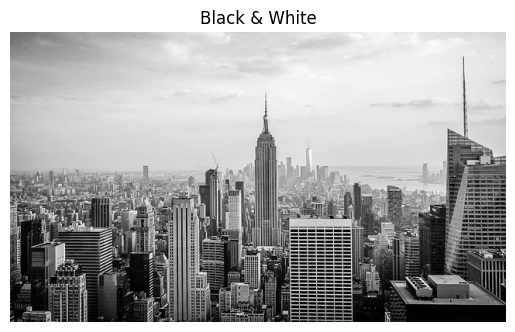

In [57]:
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread

# loading of image
image_raw = imread("NYC.jpg")
print(image_raw.shape)  

image_sum = image_raw.sum(axis=2)
print(image_sum.shape)  # Теперь (height, width)

# normalyzing (not really necessary in this case)
image_bw = image_sum / image_sum.max()
print(image_bw.max())  # Это должно вывести 1.0, так как изображение нормализовано

# printing
plt.imshow(image_bw, cmap='gray')
plt.title('Black & White')
plt.axis('off')  # Скрыть оси
plt.show()


(374, 640, 3)
Amount of components sufficient for 95%: 34


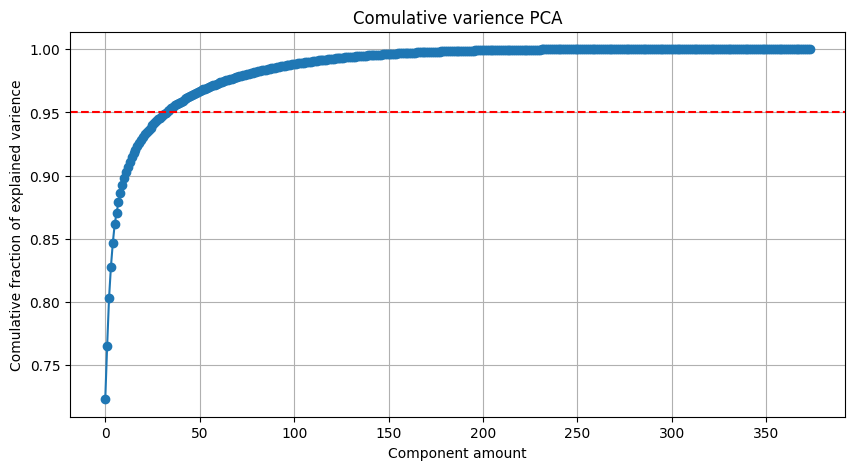

In [56]:
import math
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.image import imread

# Загрузка изображения
image_raw = imread("NYC.jpg")
print(image_raw.shape) 

# Summing RGB values for getting black-white image
image_sum = image_raw.sum(axis=2)

# normalizing
image_bw = image_sum / image_sum.max()

pca = PCA()
pca.fit(image_bw)

# calculating the varience
cumulative_variance = np.cumsum(pca.explained_variance_ratio_)

# To fin the amount of components for 95% 
components_needed = np.argmax(cumulative_variance >= 0.95) + 1
print("Amount of components sufficient for 95%:", components_needed)

# Визуализация кумулятивной дисперсии
plt.figure(figsize=(10, 5))
plt.plot(cumulative_variance, marker='o')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.title('Comulative varience PCA')
plt.xlabel('Component amount')
plt.ylabel('Comulative fraction of explained varience')
plt.grid(True)
plt.show()



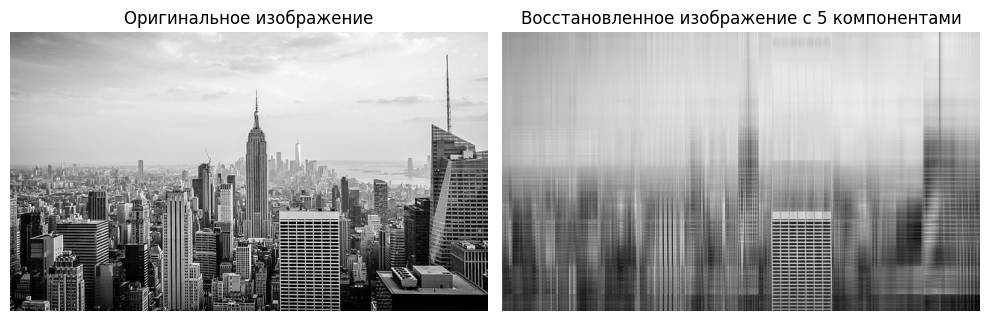

In [39]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.image import imread

# Loading and normalizing
image_raw = imread("NYC.jpg")
image_bw = image_raw.mean(axis=2) / 255.0  

# Using PCA for compressing the image
n_components = 5  # The amount of components
pca = PCA(n_components=n_components)
image_compressed = pca.fit_transform(image_bw)
image_reconstructed = pca.inverse_transform(image_compressed)

# Вывод изображений
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(image_bw, cmap='gray')
plt.title('Original image')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(image_reconstructed, cmap='gray')
plt.title(f'Reconstructed image with {n_components} components')
plt.axis('off')

plt.tight_layout()
plt.show()


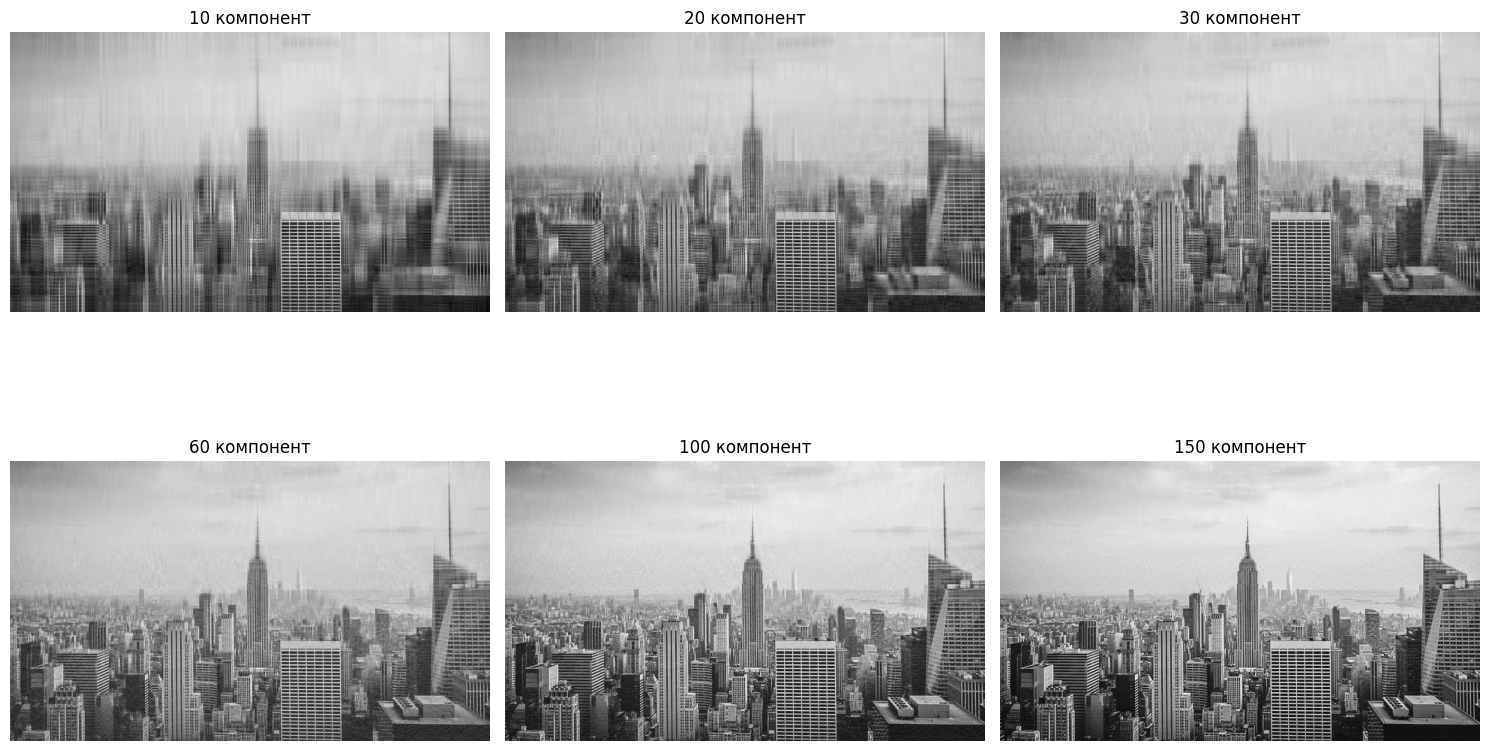

In [34]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from matplotlib.image import imread

# Loading and normalizing
image_raw = imread("NYC.jpg")
image_bw = image_raw.mean(axis=2) / 255.0  

# Количество компонент для реконструкции
n_components_list = [10, 20, 30, 60, 100, 150]

# Output the reconstruction
plt.figure(figsize=(15, 10))
for i, n_components in enumerate(n_components_list, 1):
    pca = PCA(n_components=n_components)
    image_compressed = pca.fit_transform(image_bw)
    image_reconstructed = pca.inverse_transform(image_compressed)

    plt.subplot(2, 3, i)
    plt.imshow(image_reconstructed, cmap='gray')
    plt.title(f'{n_components} компонент')
    plt.axis('off')

plt.tight_layout()
plt.show()


In [1]:
import numpy as np

def encrypt_message(message, key_matrix):
    message_vector = np.array([ord(char) for char in message])
    eigenvalues, eigenvectors = np.linalg.eig(key_matrix)
    diagonalized_key_matrix = np.dot(np.dot(eigenvectors, np.diag(eigenvalues)), np.linalg.inv(eigenvectors))
    encrypted_vector = np.dot(diagonalized_key_matrix, message_vector)
    
    return encrypted_vector
    
def decrypt_message(encrypted_message, key_matrix):
    key_matrix_inv = np.linalg.inv(key_matrix)
    decrypted_message_array = np.dot(key_matrix_inv, encrypted_message).flatten()
    decrypted_message_array = np.round(decrypted_message_array).astype(int)
    message_str = ''.join([chr(code_point) for code_point in decrypted_message_array])
    return message_str

message = "hello python is trash"
key_matrix = np.zeros((len(message), len(message)))

while np.linalg.det(key_matrix) == 0:
    key_matrix = np.random.randint(1, 256, (len(message), len(message)))  # Avoid zero values to ensure invertibility

encrypted_message = encrypt_message(message, key_matrix)
decrypted_message = decrypt_message(encrypted_message, key_matrix)

print(f"Original message: {message}")
print(f"Decrypted message: {decrypted_message}")


Original message: hello python is trash
Decrypted message: hello python is trash


C:\Users\User\AppData\Local\Temp\ipykernel_28000\1622391627.py:14: ComplexWarning: Casting complex values to real discards the imaginary part
  decrypted_message_array = np.round(decrypted_message_array).astype(int)
